## EMPLOYEE SALARY PREDICTION
### Submitted By Kanishka Sugumar

## **Importing Required Libraries**

In [3]:
import pandas as pd
import scipy
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score, root_mean_squared_error

import joblib

## **Data Loading and Exploration** 

In [4]:
data=pd.read_csv(r"Dataset/Dataset09-Employee-salary-prediction.csv")

In [5]:
data.head(2)
data.tail(2)
data.info()
data.columns
data.dtypes
data.isnull().sum()
data.shape
data[data.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


## **Data Cleaning**

In [6]:
data1 = data.drop_duplicates(keep='first')
data1.isnull().sum()
data1.dropna(how='any',inplace=True)
data1.shape
data1.head(3)

C:\Users\Kanishka\AppData\Local\Temp\ipykernel_24964\3411829824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.dropna(how='any',inplace=True)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0


## **Data Visualization**

In [7]:
data1.describe()

,Age,Years of Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


<Axes: >

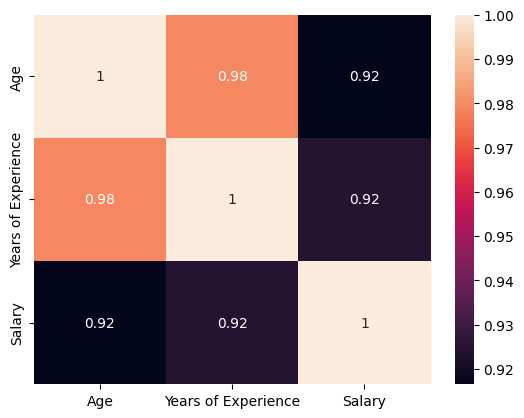

In [8]:
correlation_matrix=data1[['Age','Years of Experience','Salary']].corr()
correlation_matrix

sns.heatmap(correlation_matrix,annot=True)

<Axes: xlabel='Education Level'>

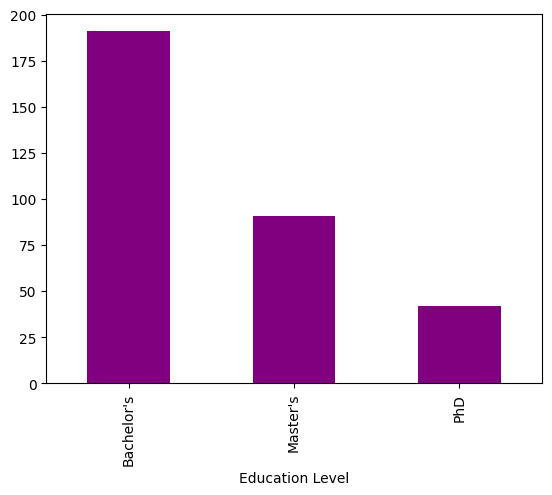

In [9]:
data1['Education Level'].value_counts()
data1['Education Level'].value_counts().plot(kind='bar',color='Purple')

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

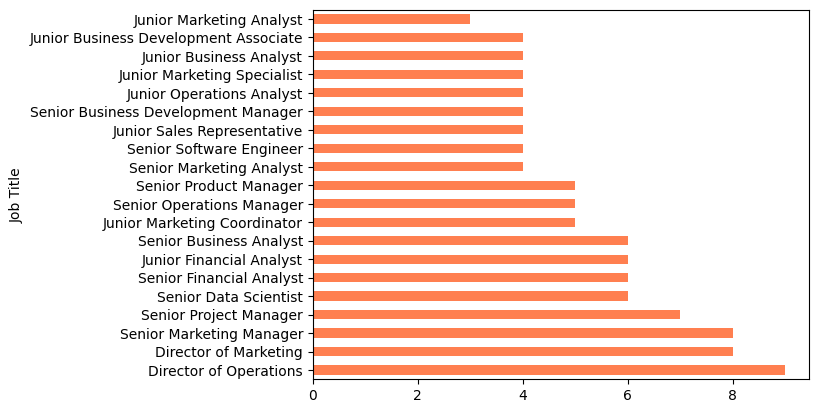

In [10]:
data1['Job Title'].value_counts().head(20).plot(kind='barh',color='coral')
data1['Job Title'].unique()

<Axes: ylabel='Gender'>

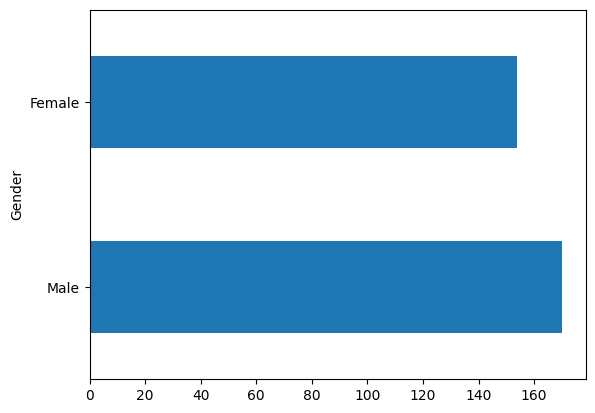

In [11]:
data1['Gender'].value_counts().plot(kind='barh')

<Axes: ylabel='Frequency'>

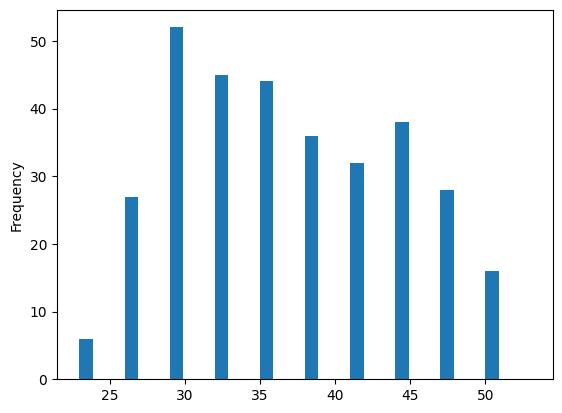

In [12]:
data1['Age'].plot(kind='hist',width=0.9)

<Axes: >

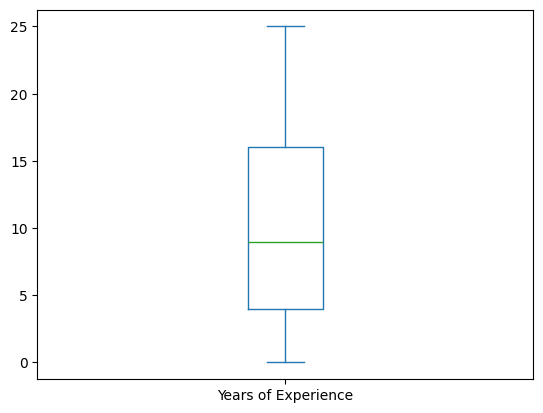

In [13]:
data1['Years of Experience'].plot(kind='box')

<Axes: >

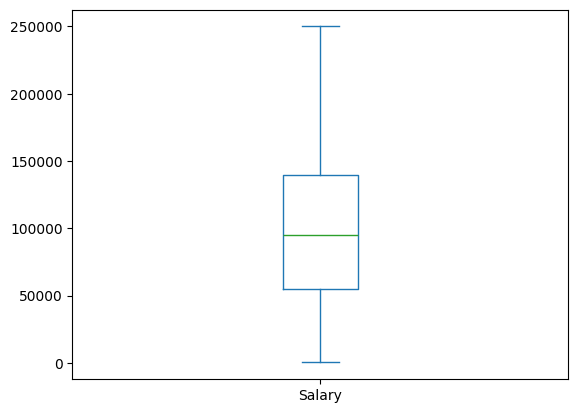

In [14]:
data1['Salary'].plot(kind='box')

In [15]:
data1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## **Data Preprocessing: Lablel Encoding and Scaling Features**

In [16]:
Label_Encoder= LabelEncoder()
gender_encoder = LabelEncoder()
education_encoder = LabelEncoder()
job_title_encoder = LabelEncoder()



In [17]:
data1['Gender_Encode'] = gender_encoder.fit_transform(data1['Gender'])
data1['Education_Encode'] = education_encoder.fit_transform(data1['Education Level'])
data1['Job_Title_Encode'] = job_title_encoder.fit_transform(data1['Job Title'])
data1.head()

C:\Users\Kanishka\AppData\Local\Temp\ipykernel_24964\1085013892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Gender_Encode'] = gender_encoder.fit_transform(data1['Gender'])
C:\Users\Kanishka\AppData\Local\Temp\ipykernel_24964\1085013892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Education_Encode'] = education_encoder.fit_transform(data1['Education Level'])
C:\Users\Kanishka\AppData\Local\Temp\ipykernel_24964\1085013892.py:3: SettingWithCopyWarning: 
A value is trying to be set 

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_Encode,Education_Encode,Job_Title_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22


In [18]:
joblib.dump(gender_encoder, 'gender_encoder.joblib')
joblib.dump(education_encoder, 'education_encoder.joblib')
joblib.dump(job_title_encoder, 'job_title_encoder.joblib')

['job_title_encoder.joblib']

In [19]:
std_scaler= StandardScaler()
age_scaler = StandardScaler()
exp_scaler = StandardScaler()

In [20]:
data1['Age_Scaled'] = age_scaler.fit_transform(data1[['Age']])
data1['Years_of_Experience_Scaled'] = exp_scaler.fit_transform(data1[['Years of Experience']])
data1.head()

C:\Users\Kanishka\AppData\Local\Temp\ipykernel_24964\1354616004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Age_Scaled'] = age_scaler.fit_transform(data1[['Age']])
C:\Users\Kanishka\AppData\Local\Temp\ipykernel_24964\1354616004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Years_of_Experience_Scaled'] = exp_scaler.fit_transform(data1[['Years of Experience']])


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_Encode,Education_Encode,Job_Title_Encode,Age_Scaled,Years_of_Experience_Scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


In [21]:
joblib.dump(age_scaler, 'age_scaler.joblib')
joblib.dump(exp_scaler, 'exp_scaler.joblib')

['exp_scaler.joblib']

### Defining x-input columns and y-output column

In [22]:
x=data1[['Age_Scaled', 'Gender_Encode', 'Education_Encode', 'Job_Title_Encode','Years_of_Experience_Scaled']]
y=data1['Salary']

In [23]:
x.head()
y.head()

0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
Name: Salary, dtype: float64

## **Splitting the Data**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state= 42)

In [26]:
x_train.shape
x_test.shape

(65, 5)

## **Evaluation of Different Models**

### List of Models

In [27]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    XGBRegressor()
]

models_dict = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "SVR": SVR(),
    "XGBRegressor": XGBRegressor()
}

### Function to evaluate each model

In [28]:
def evaluate_model(name, model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    accuracy = r2 * 100 

    return {
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2,
        'Accuracy (%)': accuracy
    }


### Results of Evaluation Metrics of the Models 

In [29]:
results = []

for model in models:
    name = model.__class__.__name__
    result = evaluate_model(name, model, x_train, x_test, y_train, y_test)
    results.append(result)

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE')  
print(results_df)

results_df.to_csv("results_df.csv", index=False)


best_model_row = results_df.loc[results_df['R2 Score'].idxmax()]
best_model_name = best_model_row['Model']
best_model_accuracy = best_model_row['Accuracy (%)']

best_model = models_dict[best_model_name]
best_model.fit(x_train, y_train)

                       Model           MAE           MSE          RMSE  \
5  GradientBoostingRegressor   9529.141440  1.563478e+08  12503.910681   
4      RandomForestRegressor   9382.082051  1.644089e+08  12822.203158   
7               XGBRegressor   9846.179387  1.715363e+08  13097.188369   
1                      Ridge  10558.838132  2.056093e+08  14339.083479   
0           LinearRegression  10570.786401  2.057541e+08  14344.132449   
2                      Lasso  10570.889600  2.057567e+08  14344.223292   
3      DecisionTreeRegressor  12153.846154  2.907692e+08  17051.956802   
6                        SVR  35990.911660  1.889483e+09  43468.178386   

   R2 Score  Accuracy (%)  
5  0.917267     91.726698  
4  0.913001     91.300136  
7  0.909230     90.922980  
1  0.891200     89.119974  
0  0.891123     89.112311  
2  0.891122     89.112173  
3  0.846137     84.613650  
6  0.000161      0.016110  


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


### Visualization of Models using Root Mean Squared Error and Accuracy : Comparison between Models

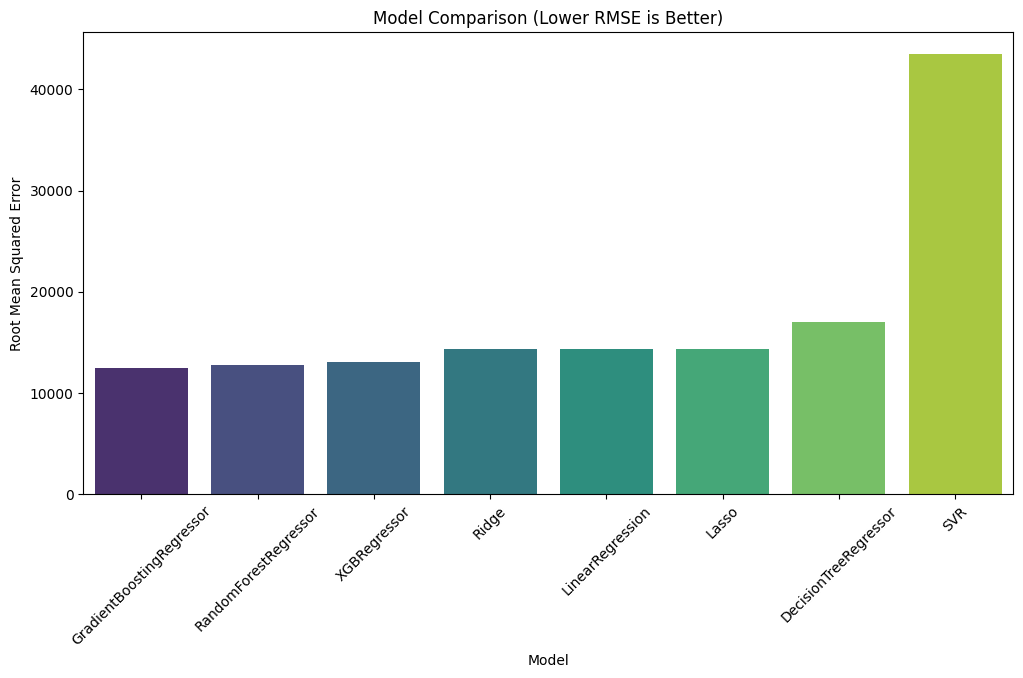

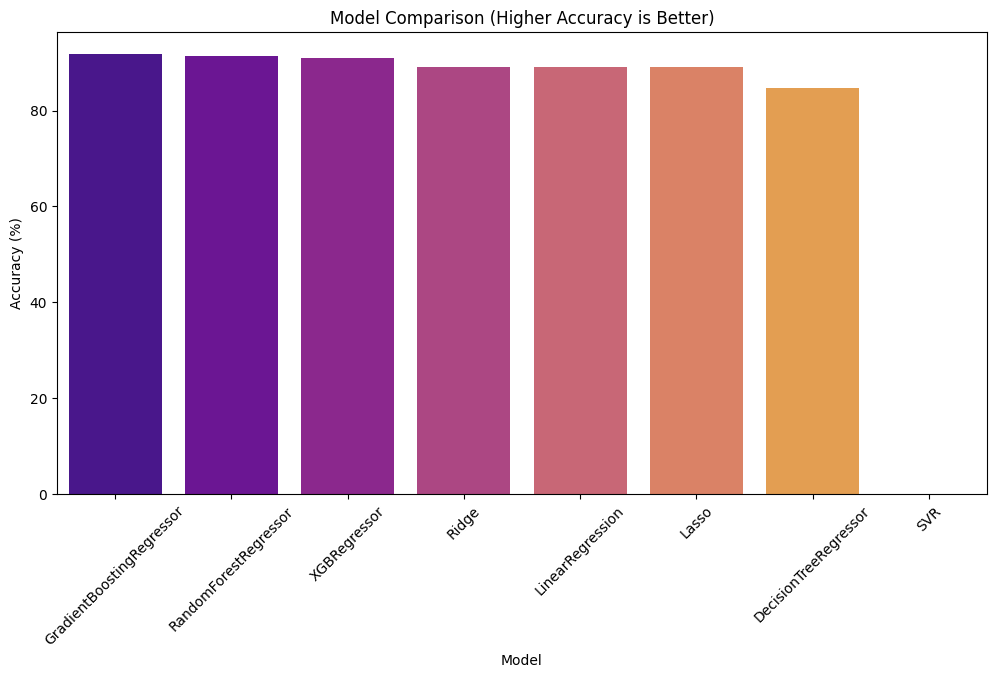

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='RMSE', hue='Model', palette='viridis', legend=False)
plt.title('Model Comparison (Lower RMSE is Better)')
plt.xticks(rotation=45)
plt.ylabel('Root Mean Squared Error')
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy (%)', hue='Model', palette='plasma', legend=False)
plt.title('Model Comparison (Higher Accuracy is Better)')
plt.xticks(rotation=45)
plt.ylabel('Accuracy (%)')
plt.show()


In [31]:
print(f"\nBest Model: {best_model_name}")
print(f"R² Score: {best_model_row['R2 Score']:.4f}")
print(f"Accuracy (%): {best_model_row['Accuracy (%)']:.2f}%")
print(f"MSE: {best_model_row['MSE']:.2f}")
print(f"RMSE: {best_model_row['RMSE']:.2f}")
print(f"MAE: {best_model_row['MAE']:.2f}")

joblib.dump(best_model, 'best_salary_model.joblib')
print("Best model saved as 'best_salary_model.joblib'")


Best Model: GradientBoostingRegressor
R² Score: 0.9173
Accuracy (%): 91.73%
MSE: 156347782.31
RMSE: 12503.91
MAE: 9529.14
Best model saved as 'best_salary_model.joblib'


In [32]:
import json

# Save metrics to a JSON file
metrics = {
    "r2": float(best_model_row['R2 Score']),
    "accuracy": float(best_model_row['Accuracy (%)']),
    "mse": float(best_model_row['MSE']),
    "rmse": float(best_model_row['RMSE']),
    "mae": float(best_model_row['MAE'])
}

with open("metrics.json", "w") as f:
    json.dump(metrics, f)

print("Evaluation metrics saved as 'metrics.json'")


Evaluation metrics saved as 'metrics.json'


In [33]:
print("Gender options:", data1['Gender'].unique())
print("Education Level options:", data1['Education Level'].unique())
print("Job Title options:", data1['Job Title'].unique())


Gender options: ['Male' 'Female']
Education Level options: ["Bachelor's" "Master's" 'PhD']
Job Title options: ['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Des